In [10]:
import pandas as pd 

ireland_df = pd.read_csv("data\\ireland_sample100.csv")
ireland_df

# # # random 
# df_sample = ireland_df.sample(n=100000, random_state=42)  # random_state για αναπαραγωγιμότητα
# # # guardar 
# df_sample.to_csv("ireland_sample100.csv", index=False)


,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
0,Ireland,"Slaney _ Wexford Harbour, LASK_020",River,06-12-2011,0.080000,1.00,8.910000,0.020000,7.900000,8.100000,6.61000,1.300,100.000000,Excellent
1,Ireland,"Lower Shannon (B), LITTLE BROSNA_040",River,13-09-2018,0.038000,1.40,5.454000,0.025000,8.100000,14.100000,3.50000,3.500,100.000000,Excellent
2,Ireland,"Corrib, Clare-Corrib",River,01-11-2022,0.038000,1.40,3.044250,0.020500,7.100000,11.200000,2.60000,2.600,100.000000,Excellent
3,Ireland,"Boyne, Boyne Estuary",Transitional,13-09-2018,0.019636,1.40,8.509091,0.016364,8.127273,14.454545,0.30275,1.300,100.000000,Excellent
4,Ireland,"Barrow, BARROW_255",River,23-06-2009,0.024000,1.50,9.450000,0.052000,8.200000,18.200000,4.50000,1.300,93.192959,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Ireland,"Nore, DININ (NORTH)_030",River,07-07-2022,0.142500,1.95,7.686000,0.089000,8.030000,16.950000,1.42200,0.375,92.337335,Good
99996,Ireland,"Slaney _ Wexford Harbour, LITTLE SLANEY_010",River,11-11-2021,0.038000,1.40,11.684103,0.025000,6.850000,8.800000,0.94000,0.940,100.000000,Excellent
99997,Ireland,"Liffey and Dublin Bay, Wicklow",River,11-06-2015,0.038000,1.40,3.546000,0.029000,6.400000,11.050000,6.65000,1.300,100.000000,Excellent
99998,Ireland,"Boyne, MOYNALTY_060",River,13-08-2008,0.081000,2.24,11.684103,0.091000,7.390000,14.200000,2.06000,1.300,92.258090,Good


In [ ]:
ireland_df["Area"].value_counts()["Liffey and Dublin Bay"]


6

In [7]:
ireland_df["Waterbody Type"].value_counts()

Waterbody Type
River           86540
Lake            10452
Transitional     1787
Coastal          1221
Name: count, dtype: int64

In [35]:

ireland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Country                           100000 non-null  object 
 1   Area                              100000 non-null  object 
 2   Waterbody Type                    100000 non-null  object 
 3   Date                              100000 non-null  object 
 4   Ammonia (mg/l)                    100000 non-null  float64
 5   Biochemical Oxygen Demand (mg/l)  100000 non-null  float64
 6   Dissolved Oxygen (mg/l)           100000 non-null  float64
 7   Orthophosphate (mg/l)             100000 non-null  float64
 8   pH (ph units)                     100000 non-null  float64
 9   Temperature (cel)                 100000 non-null  float64
 10  Nitrogen (mg/l)                   100000 non-null  float64
 11  Nitrate (mg/l)                    100000 non-null  fl

In [11]:
import pandas as pd

file_path = 'data/ireland_sample100.csv'

df = pd.read_csv(file_path)

area_counts = df['Area'].value_counts()

groups = {
    'Blackwater_Munster': ['Blackwater_Munster'],
    'Liffey and Dublin Bay': ['Liffey and Dublin Bay'],
    'Slaney': ['Slaney'],
    'Tralee': ['Tralee'],
    'Blacksod-Broadhaven': ['Blacksod-Broadhaven'],
    'Nore': ['Nore'],
    'Shannon': ['Shannon'],
    'Boyne': ['Boyne']
}

group_counts = {}
for group, keywords in groups.items():
    mask = area_counts.index.str.contains('|'.join(keywords), case=False)
    group_counts[group] = area_counts[mask].sum()

group_counts_df = pd.DataFrame(list(group_counts.items()), columns=['Group', 'Total Count'])

group_counts_df


,Group,Total Count
0,Blackwater_Munster,3789
1,Liffey and Dublin Bay,3751
2,Slaney,3953
3,Tralee,1984
4,Blacksod-Broadhaven,585
5,Nore,4969
6,Shannon,18395
7,Boyne,5181


In [21]:
keywords = ['Blackwater_Munster', 'Liffey and Dublin Bay', 'Slaney', 'Tralee',
            'Blacksod-Broadhaven', 'Nore', 'Shannon', 'Boyne']

filtered_df = df[df['Area'].str.contains('|'.join(keywords), case=False)]

quality_columns = ['Area', 'Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)',
                   'Dissolved Oxygen (mg/l)', 'Orthophosphate (mg/l)',
                   'pH (ph units)', 'Temperature (cel)', 'Nitrogen (mg/l)',
                   'Nitrate (mg/l)', 'CCME_Values']

water_quality_df = filtered_df[quality_columns]

grouped_quality = water_quality_df.groupby('Area').mean(numeric_only=True).reset_index()

grouped_quality


,Area,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values
0,"Ballyteigue-Bannow, Barrow Suir Nore Estuary",0.146033,1.505000,9.537394,4.708729,7.862941,11.923360,2.420103,1.300000,87.771472
1,"Barrow, Barrow Nore Estuary Upper",0.044209,1.557917,9.889787,4.845103,8.153333,13.361833,3.092042,1.300000,85.645663
2,"Barrow, Barrow Suir Nore Estuary",0.253232,1.689706,9.801805,1.962568,7.849118,12.443039,1.884846,1.300000,92.153459
3,"Barrow, Nore Estuary",0.039139,1.416667,9.548976,3.936786,8.176042,12.798611,2.887778,1.300000,87.997549
4,"Blacksod-Broadhaven, Blacksod-Broadhaven",0.039101,1.378803,10.095680,0.023451,7.262051,10.951197,1.337145,1.257419,99.817066
...,...,...,...,...,...,...,...,...,...,...
955,"Upper Shannon (F), Sheelin",0.041738,1.400000,8.428328,0.023612,8.226205,12.846615,0.856600,1.100467,99.475146
956,"Upper Shannon (F), YELLOW (CASTLEPOLLARD)_010",0.131218,2.160714,9.006504,0.043875,7.680000,12.965179,1.422000,1.300000,96.973469
957,"Upper Shannon (F), YELLOW (CASTLEPOLLARD)_020",0.048000,1.366667,7.771907,0.027154,7.831051,11.897179,2.445744,2.375282,100.000000
958,"Upper Shannon (F), YELLOW (CASTLEPOLLARD)_030",0.080667,1.545857,8.103759,0.039814,7.735019,11.233333,1.895086,1.805505,98.300309


In [ ]:
file_path = 'data/ireland_sample100.csv'
df = pd.read_csv(file_path)

keywords = ['Blackwater_Munster', 'Liffey and Dublin Bay', 'Slaney', 'Tralee',
            'Blacksod-Broadhaven', 'Nore', 'Shannon', 'Boyne']
filtered_df = df[df['Area'].str.contains('|'.join(keywords), case=False)]

quality_by_area = (
    filtered_df.groupby('Area')['CCME_Values']
    .mean()
    .reset_index()
    .rename(columns={'CCME_Values': 'Mean_CCME_Values'})
    .sort_values(by='Mean_CCME_Values', ascending=False)
)

quality_by_area

,Area,Mean_CCME_Values
480,"Nore, MOUNTRATH_020",100.000000
573,"Shannon Estuary North, MANUSMORE_010",100.000000
514,"Nore, New Ross",100.000000
486,"Nore, Mullinavat",100.000000
479,"Nore, MOUNTRATH_010",100.000000
...,...,...
165,"Liffey and Dublin Bay, Irish Sea Dublin (HA 09)",75.166497
640,"Shannon Estuary South, Maigue Estuary",74.619255
618,"Shannon Estuary South, Deel Estuary",72.808502
613,"Shannon Estuary South, DEEL (NEWCASTLEWEST)_090",70.818724


In [8]:
from statsmodels.tsa.stattools import adfuller
ireland_df = pd.read_csv('data/england_sample100.csv')
ireland_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in ireland_df.columns]
ireland_df['date'] = pd.to_datetime(ireland_df['date'], format="%d-%m-%Y", errors='coerce')
ireland_df['month_year'] = ireland_df['date'].dt.to_period('M')

england_ts = ireland_df.groupby('month_year')['ccme_values'].mean().dropna()
england_ts.index = england_ts.index.to_timestamp()

adf_result_ireland = adfuller(england_ts)
adf_output_ireland = {
    "ADF Statistic": adf_result_ireland[0],
    "p-value": adf_result_ireland[1],
    "Used Lags": adf_result_ireland[2],
    "N Obs": adf_result_ireland[3],
    "Critical Values": adf_result_ireland[4],
    "Stationary": adf_result_ireland[1] < 0.05
}

adf_output_ireland


{'ADF Statistic': -0.4736834335233586,
 'p-value': 0.8970504965359325,
 'Used Lags': 10,
 'N Obs': 275,
 'Critical Values': {'1%': -3.454355055831705,
  '5%': -2.8721080938842976,
  '10%': -2.572401325619835},
 'Stationary': False}

In [37]:
mean_liffey = liffey_df['CCME_Values'].mean()
print(f"Μέσος όρος CCME_Values για την περιοχή 'Liffey and Dublin Bay': {mean_liffey:.2f}")
liffey_df

Μέσος όρος CCME_Values για την περιοχή 'Liffey and Dublin Bay': 95.60


,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
23,Ireland,"Liffey and Dublin Bay, BALLYDONNELL BROOK_010",River,2019-03-06 00:00:00,0.026,1.40,11.684103,0.0120,4.70,6.40,0.200,0.20,100.000000,Excellent
38,Ireland,"Liffey and Dublin Bay, DODDER_040",River,2023-07-20 00:00:00,0.022,1.15,4.932000,0.0145,8.00,14.95,1.060,1.30,100.000000,Excellent
39,Ireland,"Liffey and Dublin Bay, LIFFEY_140",River,2016-10-13 00:00:00,0.040,1.40,11.684103,0.0900,8.30,12.00,1.720,1.71,92.298013,Good
49,Ireland,"Liffey and Dublin Bay, LIFFEY_050",River,2014-04-02 00:00:00,0.038,1.40,11.684103,0.0300,7.41,11.15,1.422,1.30,100.000000,Excellent
62,Ireland,"Liffey and Dublin Bay, CAMAC_040",River,2022-11-16 00:00:00,0.038,1.30,4.689000,0.0360,8.20,10.50,1.700,1.70,100.000000,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99847,Ireland,"Liffey and Dublin Bay, DODDER_050",River,2011-12-06 00:00:00,0.070,1.40,11.684103,0.0500,7.80,5.00,1.360,1.34,100.000000,Excellent
99874,Ireland,"Liffey and Dublin Bay, TOLKA_060",River,2013-07-10 00:00:00,0.038,1.40,4.972500,0.0250,7.80,11.15,1.422,1.30,100.000000,Excellent
99883,Ireland,"Liffey and Dublin Bay, LIFFEY_030",River,2020-05-05 00:00:00,0.038,1.40,4.977000,0.0250,7.80,12.50,0.670,0.67,100.000000,Excellent
99925,Ireland,"Liffey and Dublin Bay, TOLKA_060",River,2010-07-20 00:00:00,0.010,2.00,11.684103,69.0000,8.60,17.10,1.200,1.30,41.165847,Poor


In [30]:
import pandas as pd

# Φόρτωση dataset
file_path = 'data/ireland_sample100.csv'
df = pd.read_csv(file_path)

# Ορισμός ομάδων και keywords
groups = {
    'Blackwater_Munster': ['Blackwater_Munster'],
    'Liffey and Dublin Bay': ['Liffey and Dublin Bay'],
    'Slaney': ['Slaney'],
    'Tralee': ['Tralee'],
    'Blacksod-Broadhaven': ['Blacksod-Broadhaven'],
    'Nore': ['Nore'],
    'Shannon': ['Shannon'],
    'Boyne': ['Boyne']
}

# Υπολογισμός μέσου όρου του CCME_Values και πλήθους δειγμάτων
group_ccme_values = []

for group_name, keywords in groups.items():
    # Φιλτράρουμε τις περιοχές που περιέχουν τα keywords της ομάδας
    mask = df['Area'].str.contains('|'.join(keywords), case=False)
    group_df = df[mask]
    
    # Υπολογισμός μέσου όρου και πλήθους
    mean_value = pd.to_numeric(group_df['CCME_Values'], errors='coerce').mean()
    sample_count = len(group_df)
    
    # Αποθήκευση αποτελέσματος
    group_ccme_values.append({
        'Grupo': group_name,
        'Media_CCME_Values': mean_value,
        'Número de Muestras': sample_count
    })

# Δημιουργία τελικού DataFrame ταξινομημένου κατά μέσο όρο
result_df = pd.DataFrame(group_ccme_values).sort_values(by='Media_CCME_Values', ascending=False)

result_df


,Grupo,Media_CCME_Values,Número de Muestras
4,Blacksod-Broadhaven,99.817066,585
0,Blackwater_Munster,98.912236,3789
3,Tralee,98.834359,1984
2,Slaney,98.183483,3953
6,Shannon,98.174336,18395
5,Nore,97.363754,4969
7,Boyne,97.162391,5181
1,Liffey and Dublin Bay,95.604149,3751


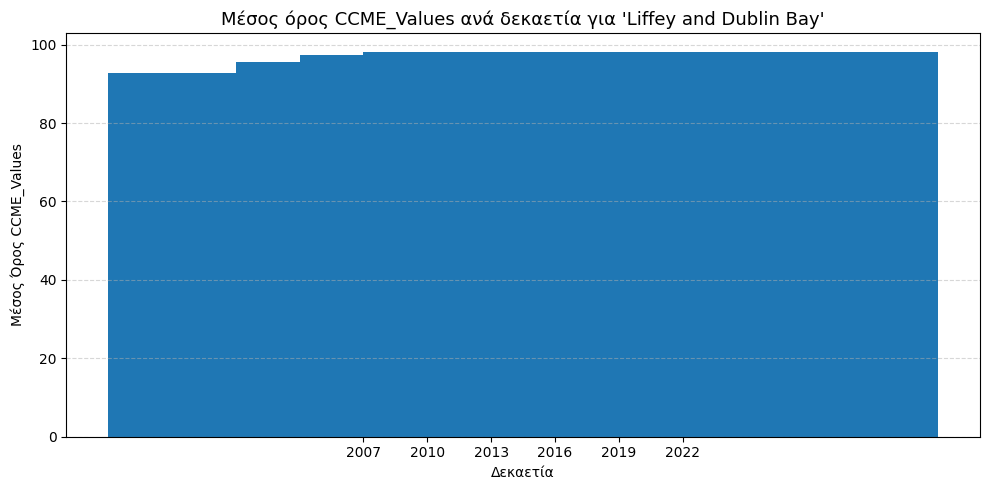

,Decade,CCME_Values
0,2007,92.667620
1,2010,92.507657
2,2013,95.510259
3,2016,97.264840
4,2019,98.069557
5,2022,98.093109


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Φόρτωση δεδομένων
file_path = 'data/ireland_sample100.csv'
df = pd.read_csv(file_path)

# Φιλτράρισμα για Liffey and Dublin Bay
liffey_df = df[df['Area'].str.contains('Liffey and Dublin Bay', case=False)].copy()

# Μετατροπή ημερομηνίας με σωστό format
liffey_df['Date'] = pd.to_datetime(liffey_df['Date'], format="%d-%m-%Y", errors='coerce')

liffey_df['CCME_Values'] = pd.to_numeric(liffey_df['CCME_Values'], errors='coerce')

liffey_df['Decade'] = (liffey_df['Date'].dt.year // 3) * 3

decade_avg = liffey_df.groupby('Decade')['CCME_Values'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(decade_avg['Decade'].astype(str), decade_avg['CCME_Values'], width=8)
plt.title("Μέσος όρος CCME_Values ανά δεκαετία για 'Liffey and Dublin Bay'", fontsize=13)
plt.xlabel("Δεκαετία")
plt.ylabel("Μέσος Όρος CCME_Values")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

decade_avg


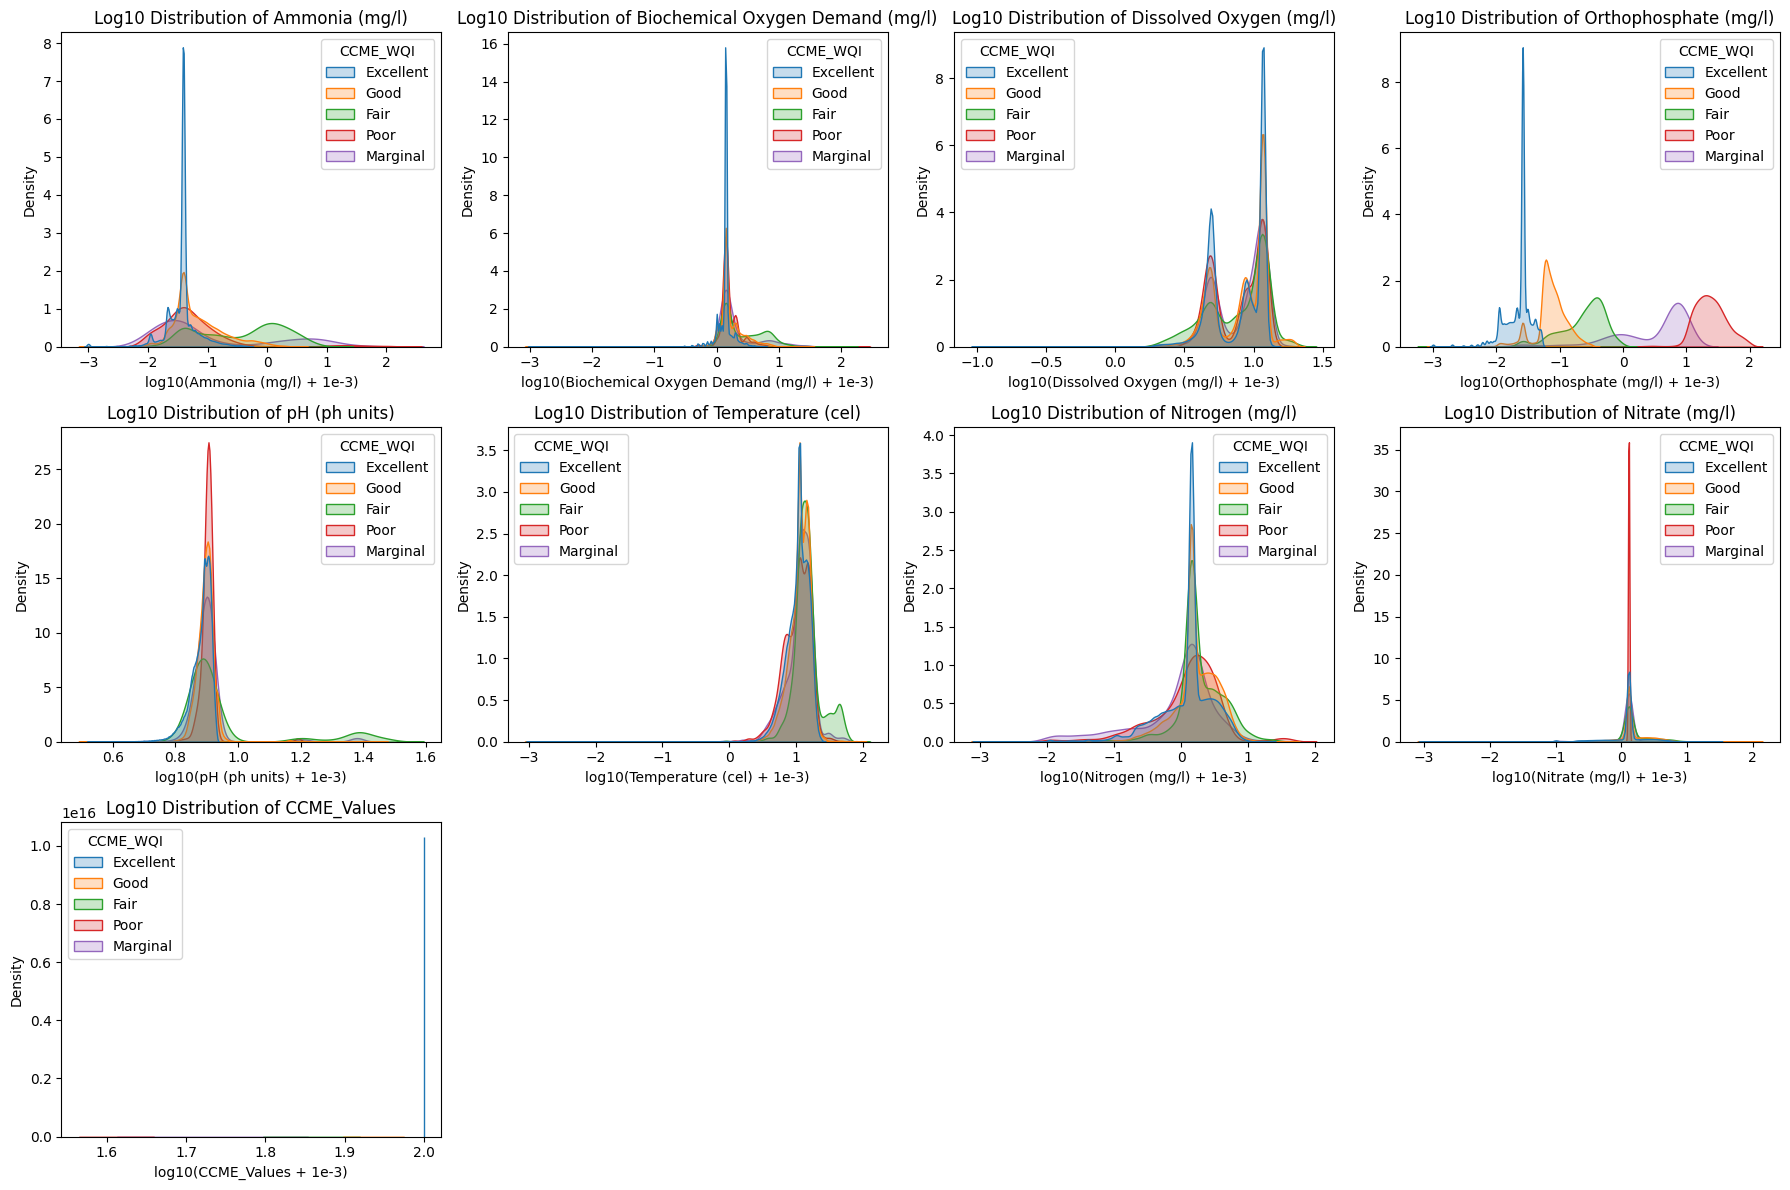

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = ireland_df.select_dtypes(include='number').columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, start=1):
    # Προσθέτουμε 1e-3 για αποφυγή προβλημάτων με log(0)
    values = ireland_df[col] + 1e-3
    values = values[values > 0]  # μόνο θετικές τιμές
    if values.empty:
        continue

    plt.subplot(3, 4, i)
    sns.kdeplot(
        x=np.log10(values),
        hue=ireland_df.loc[values.index, 'CCME_WQI'],
        fill=True,
        warn_singular=False,
        common_norm=False
    )
    plt.title(f'Log10 Distribution of {col}')
    plt.xlabel(f'log10({col} + 1e-3)')
    plt.tight_layout()

plt.show()


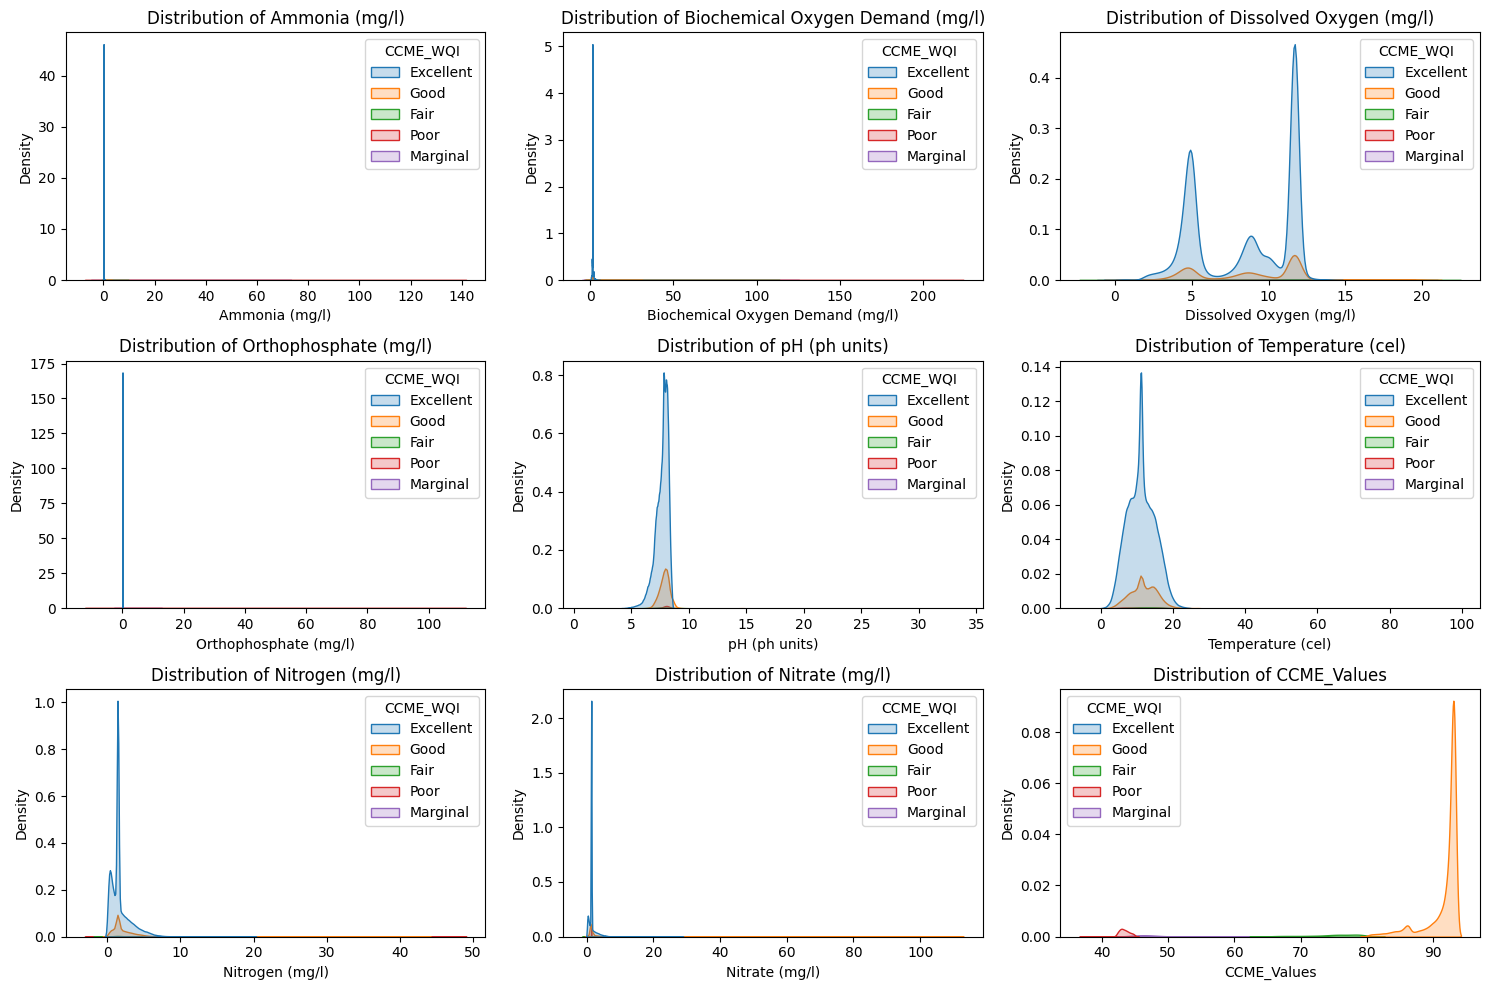

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ireland_df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=ireland_df, x=col, hue='CCME_WQI', fill=True, warn_singular=False)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()


In [8]:
ireland_df.describe()

,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values
count,235019.000000,235019.000000,235019.000000,235019.000000,235019.000000,235019.000000,235019.000000,235019.000000,235019.000000
mean,0.081181,1.528584,8.511569,0.222127,7.684261,11.319940,1.781949,1.511499,98.108782
std,0.939708,1.093641,3.233034,2.585267,0.847055,4.008148,1.511211,1.174973,6.405920
min,-0.005000,-2.000000,0.100000,-0.004000,3.200000,0.000000,0.000000,0.000000,37.192126
25%,0.030000,1.400000,4.972500,0.020000,7.400000,8.500000,0.920000,1.300000,100.000000
50%,0.038000,1.400000,9.090000,0.025000,7.800000,11.150000,1.422000,1.300000,100.000000
75%,0.043000,1.400000,11.684103,0.032000,8.055000,14.000000,2.100000,1.300000,100.000000
max,134.500000,220.000000,20.000000,100.000000,30.000000,98.000000,46.000000,112.452000,100.000000


(array([197972.,      0.,  33073.,      0.,      0.,   1629.,      0.,
          1423.,      0.,    922.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

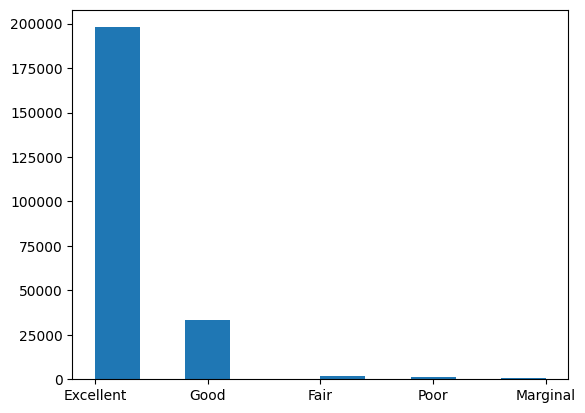

In [9]:
plt.hist(ireland_df["CCME_WQI"])

(array([8.39000e+02, 1.19100e+03, 9.70000e+01, 1.26000e+02, 2.86000e+02,
        5.09000e+02, 1.13800e+03, 3.09300e+03, 2.97680e+04, 1.97972e+05]),
 array([ 37.19212563,  43.47291307,  49.7537005 ,  56.03448794,
         62.31527538,  68.59606281,  74.87685025,  81.15763769,
         87.43842513,  93.71921256, 100.        ]),
 <BarContainer object of 10 artists>)

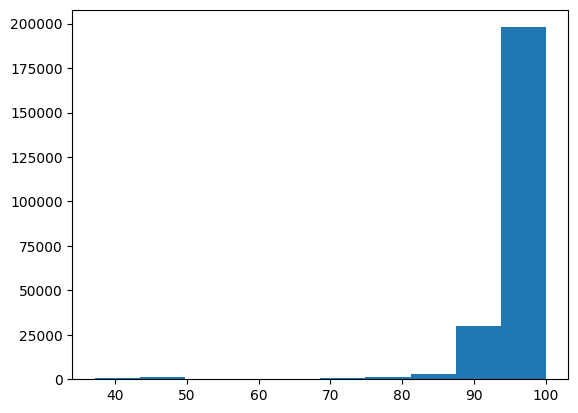

In [10]:
plt.hist(ireland_df["CCME_Values"])




In [11]:
# canada_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in canada_df.columns]
# usa_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in usa_df.columns]
ireland_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in ireland_df.columns]



# Define features and target
feature_cols = [
    'ammonia_mg_l',
    'biochemical_oxygen_demand_mg_l',
    'dissolved_oxygen_mg_l',
    'orthophosphate_mg_l',
    'ph_ph_units',
    'temperature_cel',
    'nitrogen_mg_l',
    'nitrate_mg_l'
]

##### Binary - Clasification 


In [12]:
# canada_df['wqi_binary'] = canada_df['ccme_wqi'].apply(lambda x: 1 if x in ['Excellent', 'Good'] else 0)
# usa_df['wqi_binary'] = usa_df['ccme_wqi'].apply(lambda x: 1 if x in ['Excellent', 'Good'] else 0)
ireland_df['wqi_binary'] = ireland_df['ccme_wqi'].apply(lambda x: 1 if x in ['Excellent', 'Good'] else 0)

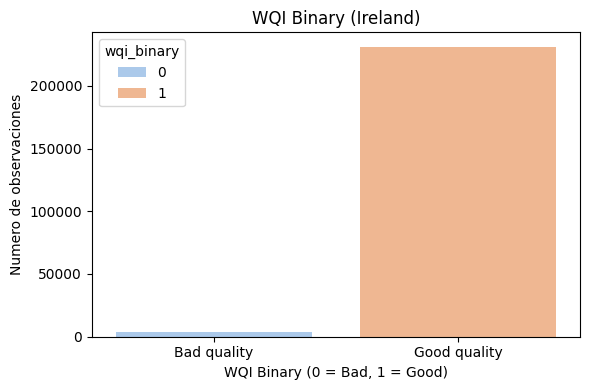

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram (countplot) for the binary target in Canada before prediction
plt.figure(figsize=(6, 4))
# sns.countplot(data=canada_df, x='wqi_binary', palette='pastel',hue='wqi_binary')
# sns.countplot(data=usa_df, x='wqi_binary', palette='pastel',hue='wqi_binary')
sns.countplot(data=ireland_df, x='wqi_binary', palette='pastel',hue='wqi_binary')

plt.title('WQI Binary (Ireland)')
plt.xlabel('WQI Binary (0 = Bad, 1 = Good)')
plt.ylabel('Numero de observaciones')
plt.xticks([0, 1], ['Bad quality', 'Good quality'])
plt.tight_layout()
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier

# X = canada_df[feature_cols]
# y = canada_df['wqi_binary']

# X = usa_df[feature_cols]
# y = usa_df['wqi_binary']

X = ireland_df[feature_cols]
y = ireland_df['wqi_binary']
class_counts = Counter(y)
scale_ratio = class_counts[0] / class_counts[1]
# model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model = GradientBoostingClassifier(random_state=42)



model = XGBClassifier(
    scale_pos_weight=scale_ratio,
    eval_metric='logloss',
    random_state=42)



pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_macro')

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

scores.mean(), report, conf_matrix

(0.9602858781160979,
 {'0': {'precision': 0.8585313174946004,
   'recall': 1.0,
   'f1-score': 0.9238814642649622,
   'support': 795.0},
  '1': {'precision': 1.0,
   'recall': 0.9971650544266268,
   'f1-score': 0.9985805151321421,
   'support': 46209.0},
  'accuracy': 0.9972130031486682,
  'macro avg': {'precision': 0.9292656587473003,
   'recall': 0.9985825272133134,
   'f1-score': 0.9612309896985521,
   'support': 47004.0},
  'weighted avg': {'precision': 0.9976072759213728,
   'recall': 0.9972130031486682,
   'f1-score': 0.9973170961584503,
   'support': 47004.0}},
 array([[  795,     0],
        [  131, 46078]], dtype=int64))

In [15]:
ireland_df.head()

,country,area,waterbody_type,date,ammonia_mg_l,biochemical_oxygen_demand_mg_l,dissolved_oxygen_mg_l,orthophosphate_mg_l,ph_ph_units,temperature_cel,nitrogen_mg_l,nitrate_mg_l,ccme_values,ccme_wqi,wqi_binary
0,Ireland,"Ballyteigue-Bannow, Adamstown",River,07-07-2010,0.038,1.4,5.940000,0.025,6.0,11.5,3.11,5.2,100.0,Excellent,1
1,Ireland,"Ballyteigue-Bannow, Adamstown",River,14-09-2010,0.038,1.4,11.684103,0.025,6.5,11.1,3.39,2.4,100.0,Excellent,1
2,Ireland,"Ballyteigue-Bannow, Adamstown",River,17-11-2010,0.038,1.4,5.850000,0.025,6.3,11.0,3.93,4.5,100.0,Excellent,1
3,Ireland,"Ballyteigue-Bannow, Adamstown",River,09-03-2011,0.038,1.4,6.030000,0.025,6.2,10.9,3.20,4.2,100.0,Excellent,1
4,Ireland,"Ballyteigue-Bannow, Adamstown",River,29-06-2011,0.038,1.4,3.420000,0.025,6.2,11.1,2.70,4.3,100.0,Excellent,1


#### Multi - Clasificacion 

In [16]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

y_multi = ireland_df['ccme_wqi']
X = ireland_df[feature_cols]

# Orden de categorias
quality_order = [['Poor', 'Marginal', 'Fair', 'Good', 'Excellent']]
oe = OrdinalEncoder(categories=quality_order)

y_array = np.array(y_multi).reshape(-1, 1)
y_encoded = oe.fit_transform(y_array).ravel()

# Modelos 
model = XGBClassifier(random_state=42)
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model = GradientBoostingClassifier(random_state=42)

#  Pipeline 
pipeline_multi = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

# Cross-validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline_multi, X, y_encoded, cv=cv, scoring='f1_macro')

print("Cross-validated F1-macro scores:", scores)
print("Average F1-macro:", np.mean(scores))

# Cross-validated predictions for classification report 
y_pred_cv = cross_val_predict(pipeline_multi, X, y_encoded, cv=cv)

#  Inverse transform 
y_pred_labels_cv = oe.inverse_transform(y_pred_cv.reshape(-1, 1)).ravel()
y_true_labels_cv = oe.inverse_transform(y_encoded.reshape(-1, 1)).ravel()

labels_order = ['Poor', 'Marginal', 'Fair', 'Good', 'Excellent']
print(classification_report(
    y_true_labels_cv,
    y_pred_labels_cv,
    labels=labels_order,
    target_names=labels_order
))


Cross-validated F1-macro scores: [0.9758731  0.96978426 0.97299387 0.97875701 0.97166777]
Average F1-macro: 0.9738152012654622
              precision    recall  f1-score   support

        Poor       1.00      0.99      0.99      1423
    Marginal       0.97      0.96      0.96       922
        Fair       0.90      0.97      0.93      1629
        Good       0.98      0.98      0.98     33073
   Excellent       1.00      1.00      1.00    197972

    accuracy                           0.99    235019
   macro avg       0.97      0.98      0.97    235019
weighted avg       0.99      0.99      0.99    235019



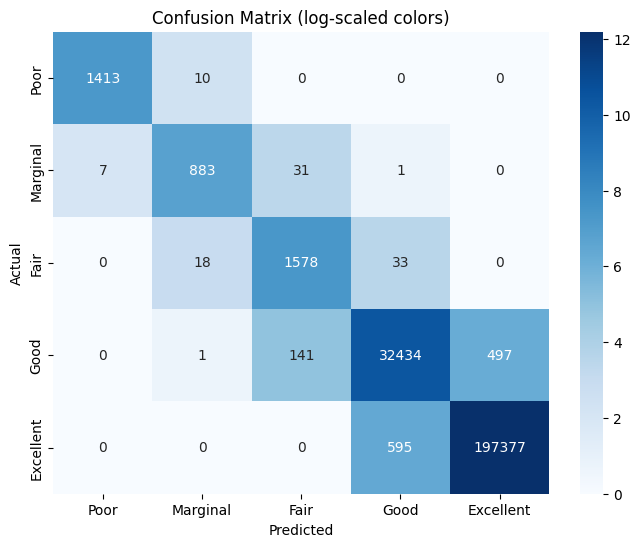

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Confusion Matrix (υποθέτουμε ότι έχεις τα labels και predictions)
cm = confusion_matrix(y_true_labels_cv, y_pred_labels_cv, labels=labels_order)

plt.figure(figsize=(8, 6))
sns.heatmap(
    np.log1p(cm),  # log(1 + x) για να αποφύγουμε log(0)
    annot=cm,
    fmt='d',
    cmap='Blues',
    xticklabels=labels_order,
    yticklabels=labels_order
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (log-scaled colors)')
plt.show()


In [18]:
# === 8. Feature Importance (μόνο από κανονική fit) ===
# Κάνουμε fit στο πλήρες training set για να δούμε τα weights
pipeline_multi.fit(X, y_encoded)
xgb_model = pipeline_multi.named_steps['classifier']

importances = xgb_model.feature_importances_

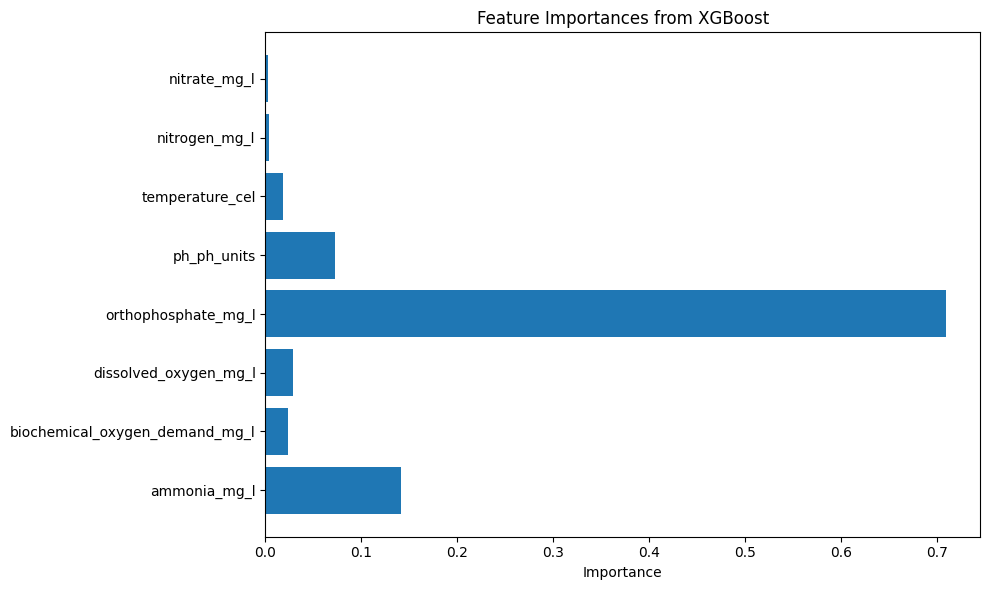

In [19]:
# Προβολή
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances)
plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns)
plt.xlabel('Importance')
plt.title('Feature Importances from XGBoost')
plt.tight_layout()
plt.show()

In [20]:
# Predict probabilities for class 0 (Bad water)
y_proba = pipeline.predict_proba(X_test)[:, 0]

# Create alert levels
X_test_alerts = X_test.copy()
X_test_alerts['proba_bad'] = y_proba
X_test_alerts['true_label'] = y_test.values
X_test_alerts['alert_level'] = pd.cut(
    y_proba,
    bins=[0, 0.4, 0.7, 1],
    labels=['Safe', 'Moderate Risk', 'High Risk']
)

# Return top 10 risk cases
X_test_alerts[['proba_bad', 'true_label', 'alert_level']].sort_values(by='proba_bad', ascending=False)


,proba_bad,true_label,alert_level
104553,1.0,0,High Risk
103657,1.0,0,High Risk
181116,1.0,0,High Risk
163222,1.0,0,High Risk
181124,1.0,0,High Risk
...,...,...,...
69089,0.0,1,NaN
93183,0.0,1,NaN
144593,0.0,1,NaN
187211,0.0,1,NaN


### Regresion 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Datos
X = ireland_df[feature_cols]
y = ireland_df['ccme_values']

# 2. modelos
model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1
)

# 3. Pipeline
reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', model)
])

# 4. Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit & Predict
reg_pipeline.fit(X_train_r, y_train_r)
y_pred_r = reg_pipeline.predict(X_test_r)

mae = mean_absolute_error(y_test_r, y_pred_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2 = r2_score(y_test_r, y_pred_r)

print("=== Test Set Metrics ===")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

=== Test Set Metrics ===
MAE: 0.111
RMSE: 0.771
R²: 0.986


In [22]:
# 7. Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# R²
cv_r2_scores = cross_val_score(reg_pipeline, X, y, cv=cv, scoring='r2')
print("\n=== Cross-Validated R² Scores ===")
print(np.round(cv_r2_scores, 3))
print("Average R²:", np.mean(cv_r2_scores).round(3))

# MAE (-score)
cv_mae_scores = -cross_val_score(reg_pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error')
print("\n=== Cross-Validated MAE Scores ===")
print(np.round(cv_mae_scores, 3))
print("Average MAE:", np.mean(cv_mae_scores).round(3))


=== Cross-Validated R² Scores ===
[0.986 0.985 0.986 0.991 0.985]
Average R²: 0.986

=== Cross-Validated MAE Scores ===
[0.111 0.112 0.104 0.097 0.114]
Average MAE: 0.108


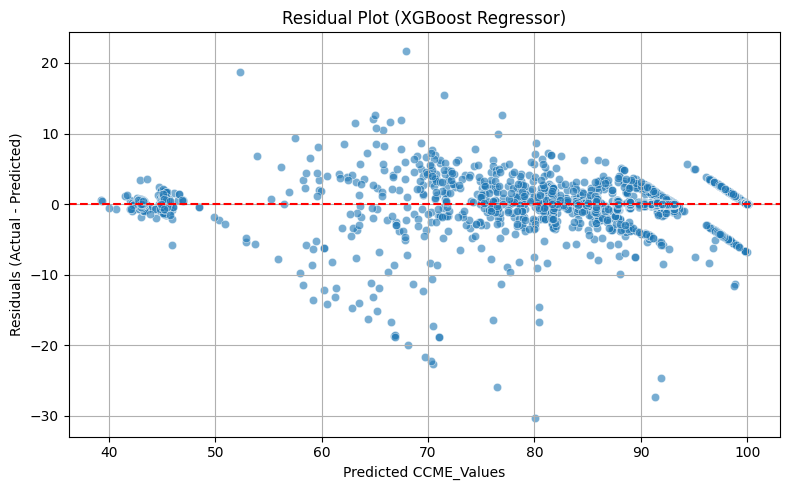

In [23]:
# residuals
residuals = y_test_r - y_pred_r

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_r, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CCME_Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (XGBoost Regressor)")
plt.grid(True)
plt.tight_layout()
plt.show()


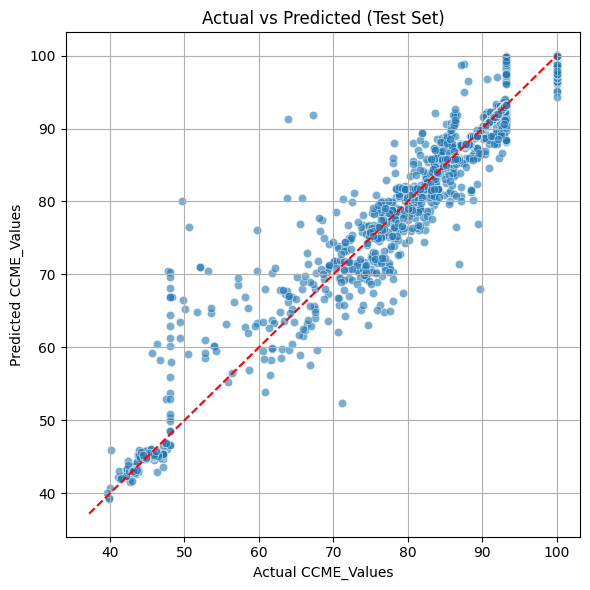

In [24]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_r, y=y_pred_r, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual CCME_Values')
plt.ylabel('Predicted CCME_Values')
plt.title('Actual vs Predicted (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Clustering

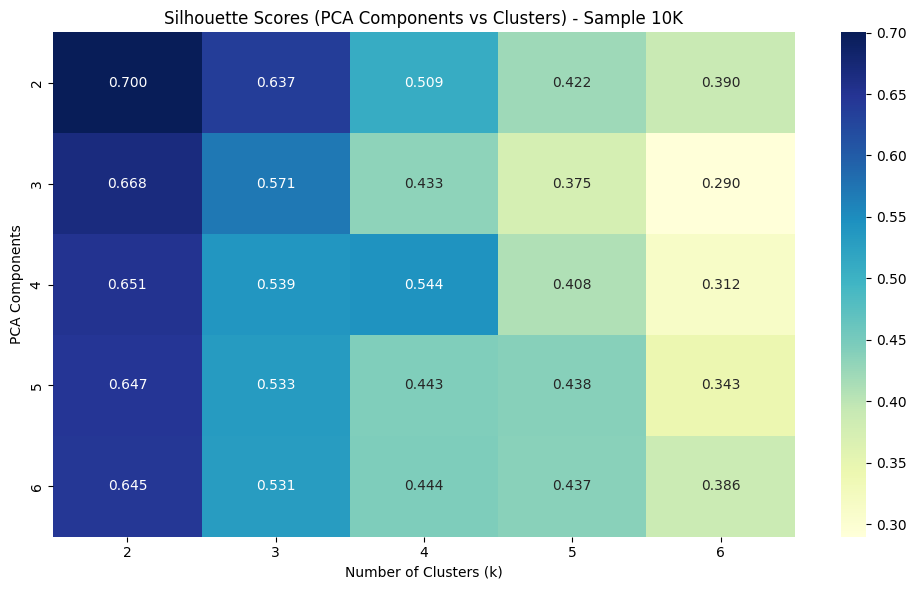

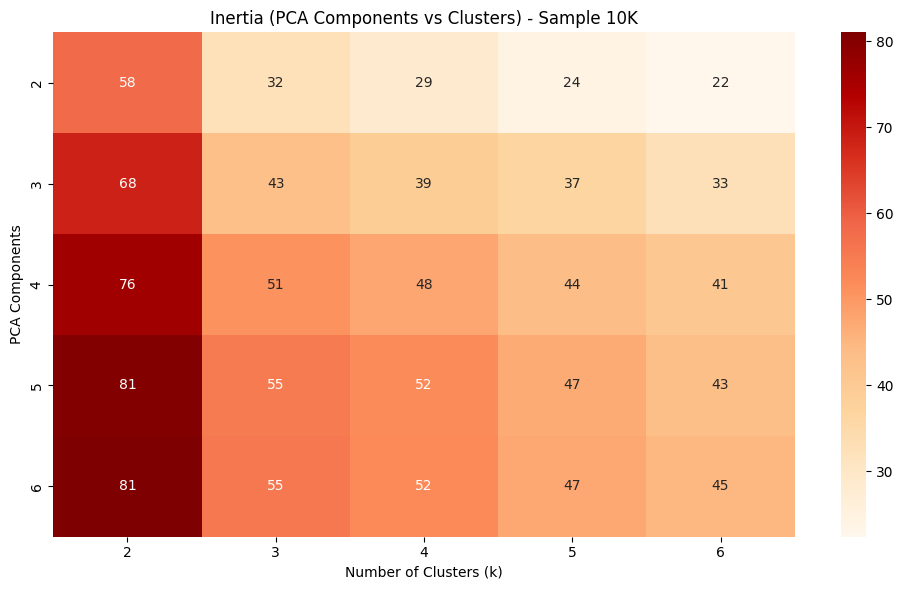

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

# 1. Κανονικοποίηση
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(ireland_df[feature_cols])

# 2. Υποδειγματοληψία
X_sample = resample(X_scaled, n_samples=10000, random_state=42)

# 3. Ρυθμίσεις
component_range = range(2, 7)  # PCA components
k_range = range(2, 7)          # Clusters

# 4. Αποθήκευση αποτελεσμάτων
results = []

for n_comp in component_range:
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X_sample)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(X_pca)
        
        silhouette = silhouette_score(X_pca, labels)
        inertia = kmeans.inertia_
        
        results.append({
            'n_components': n_comp,
            'k': k,
            'silhouette': silhouette,
            'inertia': inertia
        })

# 5. Μετατροπή σε DataFrame
results_df = pd.DataFrame(results)

# 6. Heatmap για Silhouette
heatmap_sil = results_df.pivot(index='n_components', columns='k', values='silhouette')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_sil, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Silhouette Scores (PCA Components vs Clusters) - Sample 10K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("PCA Components")
plt.tight_layout()
plt.show()

# 7. Heatmap για Inertia
heatmap_inertia = results_df.pivot(index='n_components', columns='k', values='inertia')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_inertia, annot=True, fmt=".0f", cmap="OrRd")
plt.title("Inertia (PCA Components vs Clusters) - Sample 10K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("PCA Components")
plt.tight_layout()
plt.show()


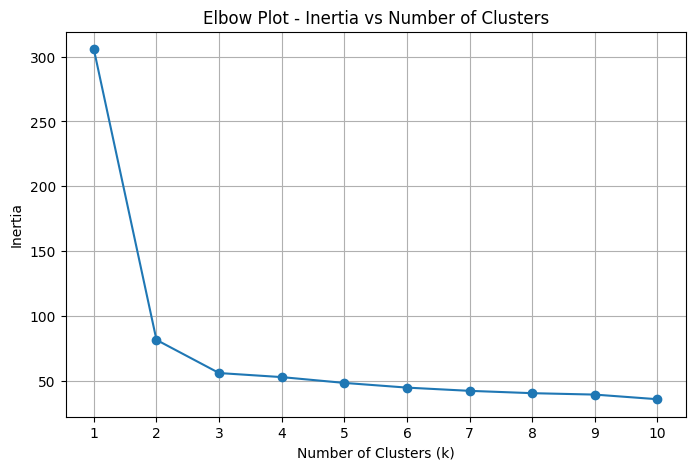

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_sample)  # Χρησιμοποιούμε δείγμα 10.000
    inertias.append(kmeans.inertia_)

# Γράφημα
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Plot - Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(k_range)
plt.show()


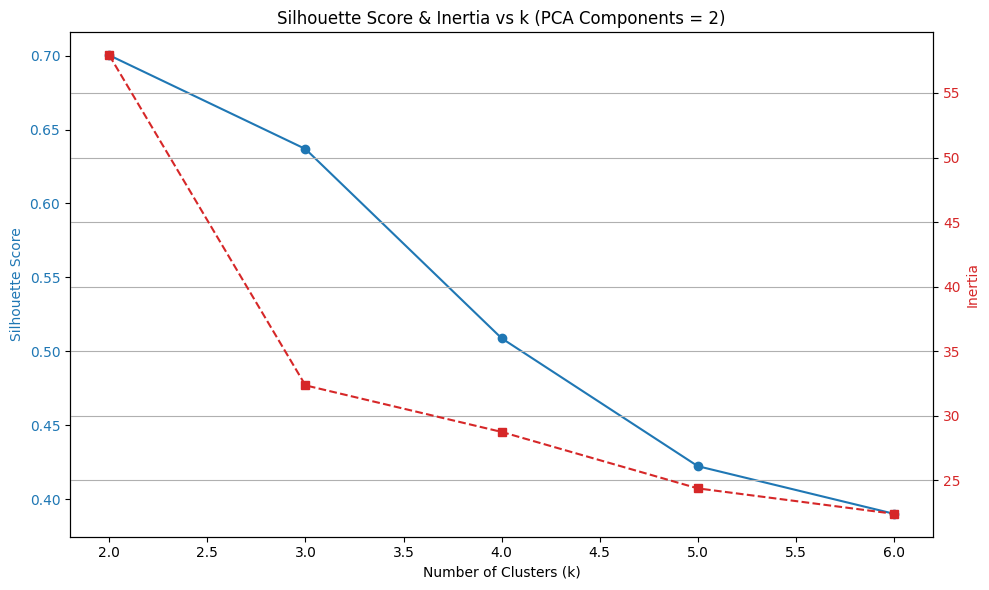

In [36]:
# Επιλογή ενός n_components (π.χ. 2)
selected_pca = 2

# Φιλτράρισμα των αποτελεσμάτων για το συγκεκριμένο PCA
subset = results_df[results_df['n_components'] == selected_pca]

# Συνδυασμένο γράφημα
fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Silhouette Score', color=color1)
ax1.plot(subset['k'], subset['silhouette'], marker='o', color=color1, label='Silhouette Score')
ax1.tick_params(axis='y', labelcolor=color1)

# Δεύτερος y άξονας για Inertia
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Inertia', color=color2)
ax2.plot(subset['k'], subset['inertia'], marker='s', linestyle='--', color=color2, label='Inertia')
ax2.tick_params(axis='y', labelcolor=color2)

# Τίτλος
plt.title(f'Silhouette Score & Inertia vs k (PCA Components = {selected_pca})')
fig.tight_layout()
plt.grid(True)
plt.show()


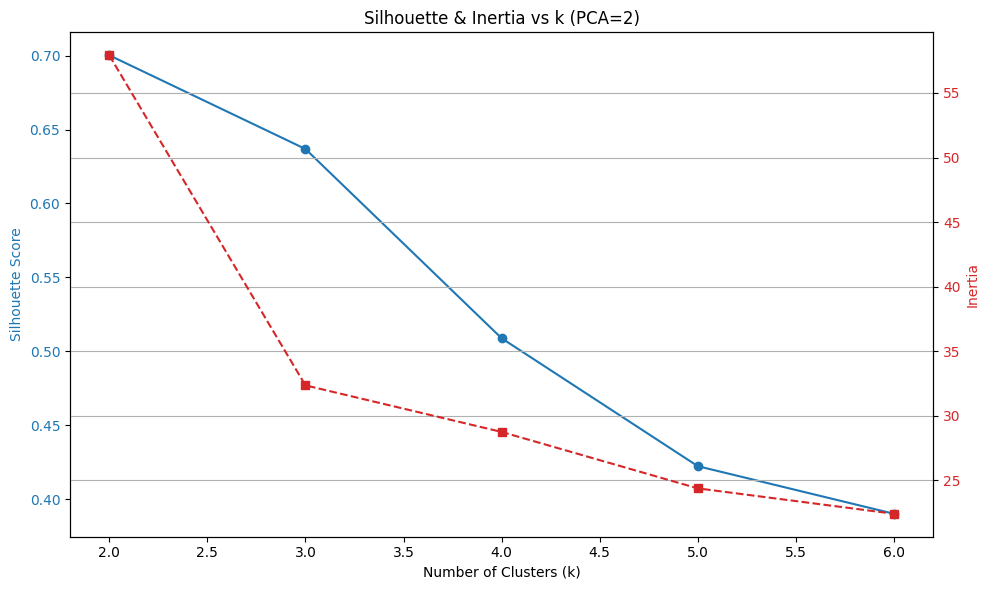

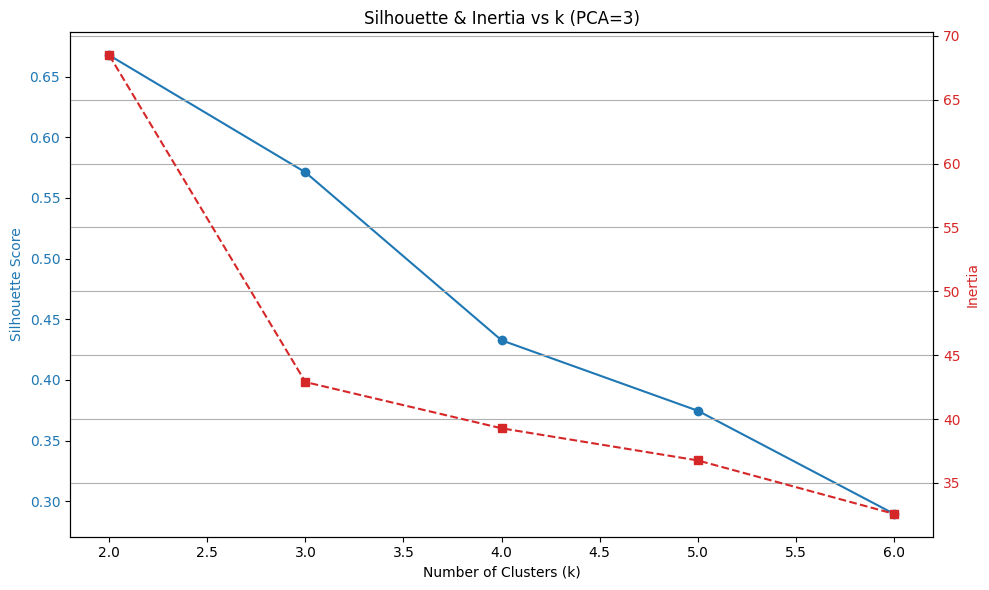

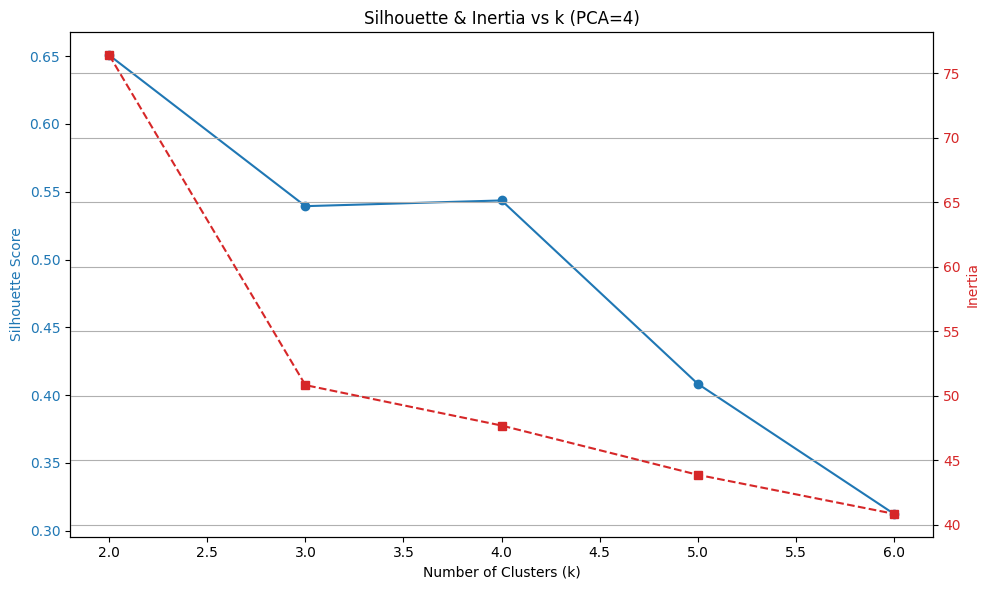

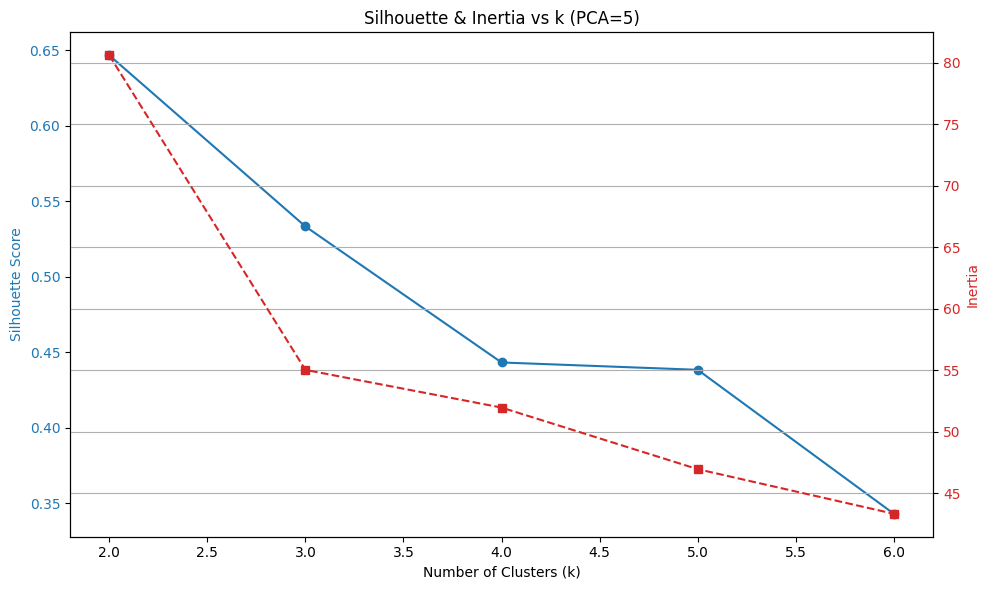

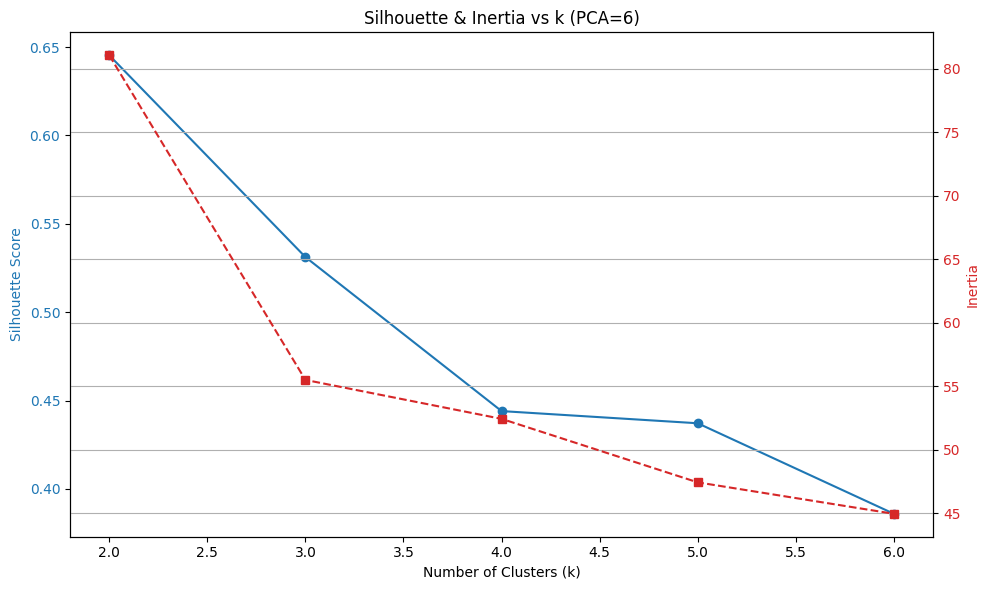

In [37]:
for selected_pca in component_range:
    subset = results_df[results_df['n_components'] == selected_pca]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Silhouette Score', color='tab:blue')
    ax1.plot(subset['k'], subset['silhouette'], marker='o', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Inertia', color='tab:red')
    ax2.plot(subset['k'], subset['inertia'], marker='s', linestyle='--', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(f'Silhouette & Inertia vs k (PCA={selected_pca})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Προετοιμασία Δεδομένων ===
feature_cols = [
    'ammonia_mg_l',
    'biochemical_oxygen_demand_mg_l',
    'dissolved_oxygen_mg_l',
    'orthophosphate_mg_l',
    'ph_ph_units',
    'temperature_cel',
    'nitrogen_mg_l',
    'nitrate_mg_l'
]

X = ireland_df[feature_cols]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  KMeans on PCA 
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
sil_kmeans = silhouette_score(X_pca, kmeans_labels)

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)
sil_gmm = silhouette_score(X_pca, gmm_labels)

print("🔎 Silhouette Scores:")
print(f"KMeans  (PCA):  {sil_kmeans:.3f}")
print(f"GMM     (PCA):  {sil_gmm:.3f}")

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# KMeans
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='tab10', ax=axes[0])
axes[0].set_title(f'KMeans (Silhouette: {sil_kmeans:.3f})')

# GMM
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette='tab10', ax=axes[1])
axes[1].set_title(f'GMM (Silhouette: {sil_gmm:.3f})')

for ax in axes:
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="Cluster", loc='best')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

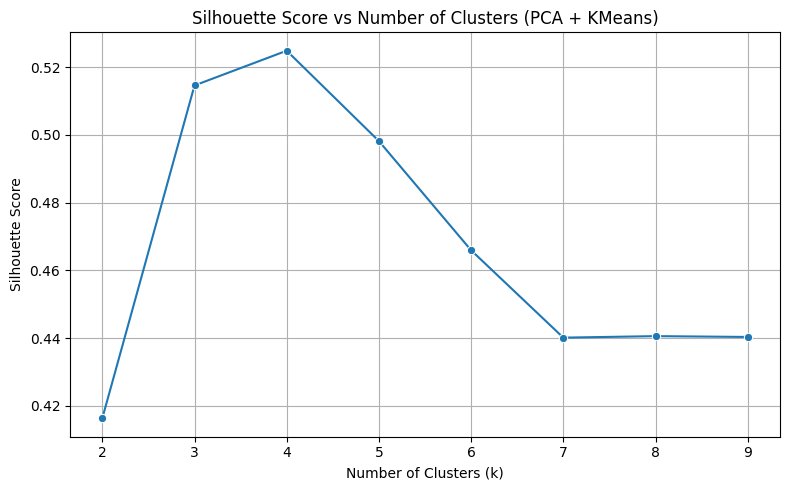

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # === PCA πριν το clustering ===
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# # === Silhouette για διάφορα k πάνω σε PCA-transformed data ===
# silhouette_pca_scores = []

# k_values = range(2, 10)
# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(X_pca)
#     score = silhouette_score(X_pca, labels)
#     silhouette_pca_scores.append(score)

# # === Γράφημα ===
# plt.figure(figsize=(8, 5))
# sns.lineplot(x=k_values, y=silhouette_pca_scores, marker='o')
# plt.title("Silhouette Score vs Number of Clusters (PCA + KMeans) China")
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Silhouette Score")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range
component_range = range(2, 7)  # PCA components: 2 a 6
k_range = range(2, 7)     # Clusters: 3 a 4

# Guardar resultados
results = []

for n_comp in component_range:
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X_scaled)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_pca)
        score = silhouette_score(X_pca, labels)
        results.append({
            'n_components': n_comp,
            'k': k,
            'silhouette': score
        })

# Convertir a DataFrame
results_df = pd.DataFrame(results)

# Pivot por  heatmap
heatmap_data = results_df.pivot(index='n_components', columns='k', values='silhouette')

# Visualicación
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Silhouette Scores (PCA Components vs KMeans Clusters)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("PCA Components")
plt.tight_layout()
plt.show()
